<a href="https://colab.research.google.com/github/zkibnksmh/MachineLearningTasks/blob/main/6thWeekTask/KMeans_Clustering_OtherDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Zaky Ibnu Kusumah
#1103204213
#KMeans_Clustering_OtherDataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd

In [10]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/Dataset/Delivery.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)
df

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30,11:45,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45,19:50,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,13:50,13:55,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,10:60,11:15,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,23:50,23:60,3,2,0,2,3,1.0,1,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2438,0xcafe_y,ALHRES13DEL02,32,4.8,25.451646,81.832796,25.581646,81.962796,22:15,22:25,3,2,2,0,4,1.0,1,4,29.0
2438,2439,0x8c03_y,COIMBRES09DEL01,34,5.0,11.008638,76.984311,11.078638,77.054311,18:30,18:45,2,3,1,0,3,1.0,1,3,22.0
2439,2440,0xceec_y,KNPRES04DEL03,37,4.6,26.471529,80.313458,26.501529,80.343458,17:50,17:60,1,3,0,0,3,1.0,1,1,28.0
2440,2441,0x38c6_x,JAPRES11DEL01,24,4.8,26.902940,75.793007,26.942940,75.833007,13:20,13:25,6,0,2,2,2,0.0,1,3,12.0


In [11]:
# Mengecek nilai NaN dalam seluruh dataframe
df_nan = df.isna().sum()
print("Dataframe dengan nilai NaN:")
print(df_nan)
df.info()

Dataframe dengan nilai NaN:
Unnamed: 0                      0
ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings        94
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Time_Orderd                    89
Time_Order_picked               0
Weatherconditions               0
Road_traffic_density            0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
multiple_deliveries            54
Festival                        0
City                            0
Time_taken(min)                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2442 non-null   int64 

In [12]:
# Mengisi nilai null dengan rata-rata (mean) pada type data numerical
mean_age = df['Delivery_person_Age'].mean()
mean_ratings = df['Delivery_person_Ratings'].mean()
mean_deliveries = df['multiple_deliveries'].mean()

df['Delivery_person_Age'].fillna(mean_age, inplace=True)
df['Delivery_person_Ratings'].fillna(mean_ratings, inplace=True)
df['multiple_deliveries'].fillna(mean_deliveries, inplace=True)


# Mengisi nilai null dengan modus (nilai yang paling sering muncul) pada type data object
df['Weatherconditions'].fillna(df['Weatherconditions'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

df_nan = df.isna().sum()
df_nan

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [13]:
df

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30,11:45,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45,19:50,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,13:50,13:55,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,10:60,11:15,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,23:50,23:60,3,2,0,2,3,1.0,1,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2438,0xcafe_y,ALHRES13DEL02,32,4.8,25.451646,81.832796,25.581646,81.962796,22:15,22:25,3,2,2,0,4,1.0,1,4,29.0
2438,2439,0x8c03_y,COIMBRES09DEL01,34,5.0,11.008638,76.984311,11.078638,77.054311,18:30,18:45,2,3,1,0,3,1.0,1,3,22.0
2439,2440,0xceec_y,KNPRES04DEL03,37,4.6,26.471529,80.313458,26.501529,80.343458,17:50,17:60,1,3,0,0,3,1.0,1,1,28.0
2440,2441,0x38c6_x,JAPRES11DEL01,24,4.8,26.902940,75.793007,26.942940,75.833007,13:20,13:25,6,0,2,2,2,0.0,1,3,12.0


In [14]:
df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

In [15]:
df = df.drop(columns=["ID",'Delivery_person_ID','Time_Orderd','Time_Order_picked','Weatherconditions','Road_traffic_density','Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City'])
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
0,1,37,4.9,22.745049,75.892471,22.765049,75.912471,24.0
1,2,34,4.5,12.913041,77.683237,13.043041,77.813237,33.0
2,3,37,4.4,12.913041,77.683237,12.953041,77.723237,42.0
3,4,28,4.9,17.431477,78.400350,17.451477,78.420350,19.0
4,5,37,4.6,23.359407,85.325055,23.429407,85.395055,25.0


In [16]:
df.columns

Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_taken(min)'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

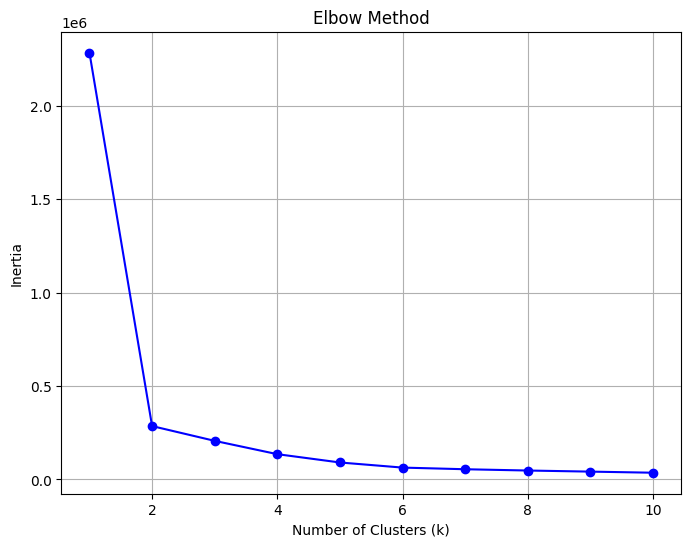

In [17]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


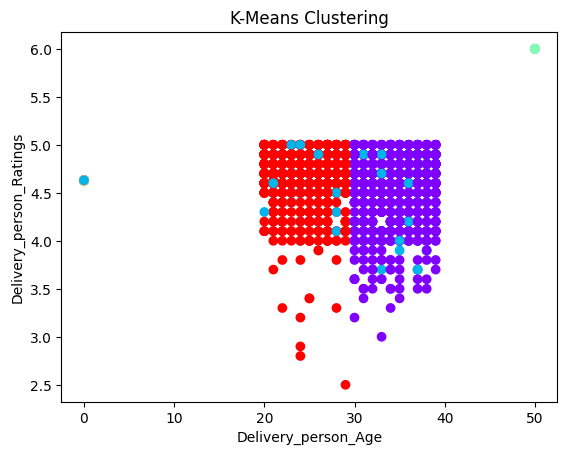

In [18]:
# Pilih atribut untuk K-Means Clustering
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Tentukan jumlah cluster (K) yang diinginkan
k = 5  # Anda dapat mengganti jumlah cluster sesuai dengan kebutuhan

# Membuat model K-Means dengan jumlah cluster K
kmeans = KMeans(n_clusters=k)

# Melakukan clustering pada atribut yang telah dipilih
df['Cluster'] = kmeans.fit_predict(attributes)

# Visualisasi hasil clustering (jika diperlukan)
plt.scatter(attributes['Delivery_person_Age'], attributes['Delivery_person_Ratings'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.title('K-Means Clustering')
plt.show()

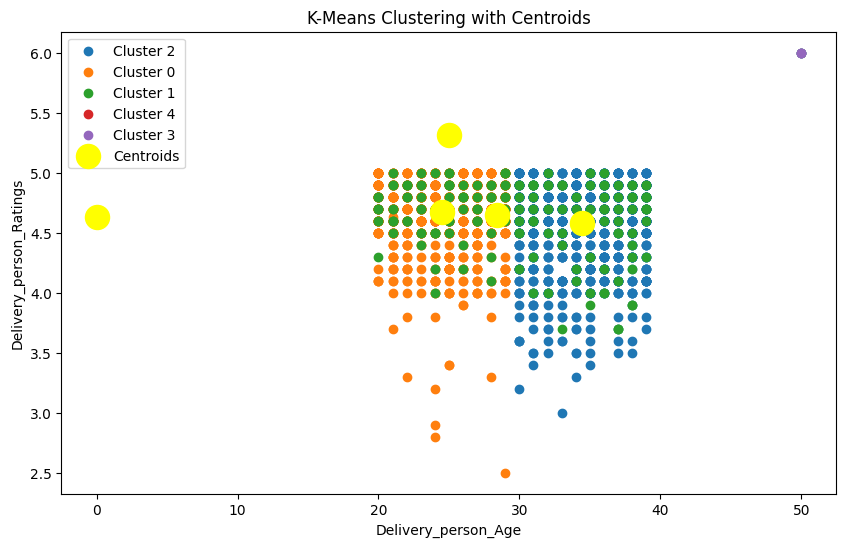

In [19]:
# Pilih atribut untuk K-Means Clustering
attributes = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_longitude', 'Delivery_location_longitude']]

# Tentukan jumlah cluster (K) yang diinginkan
k = 5

# Membuat model K-Means dengan jumlah cluster K
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)

# Melakukan clustering pada atribut yang telah dipilih
df['label'] = kmeans.fit_predict(attributes)

# Visualisasi hasil clustering dengan keterangan dan centroid
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Delivery_person_Age'], df[df['label'] == label]['Delivery_person_Ratings'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.legend()
plt.show()


In [20]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.8992
Silhouette Score for k=3: 0.4289
Silhouette Score for k=4: 0.4322
Silhouette Score for k=5: 0.4587
Silhouette Score for k=6: 0.4943
Silhouette Score for k=7: 0.4141
Silhouette Score for k=8: 0.3874
Silhouette Score for k=9: 0.3799
Silhouette Score for k=10: 0.4200


In [21]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.1720
Davies-Bouldin Index for k=3: 0.7026
Davies-Bouldin Index for k=4: 0.6305
Davies-Bouldin Index for k=5: 0.5804
Davies-Bouldin Index for k=6: 0.5472
Davies-Bouldin Index for k=7: 0.6552
Davies-Bouldin Index for k=8: 0.6840
Davies-Bouldin Index for k=9: 0.7395
Davies-Bouldin Index for k=10: 0.6591
